In [1]:
%load_ext autoreload
%autoreload 2

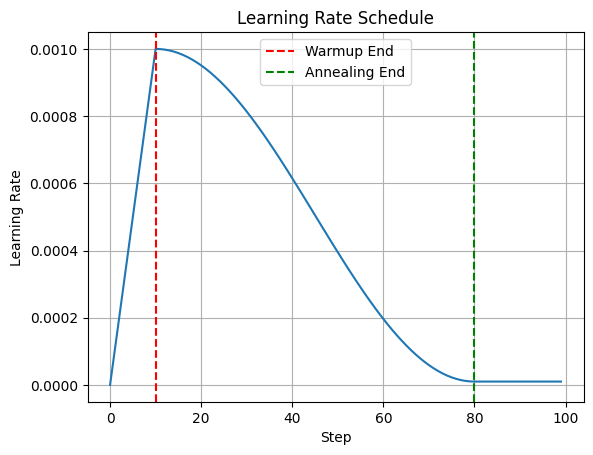

In [11]:
from functools import partial

import matplotlib.pyplot as plt

from cs336_basics.training.lr_schedulers import lr_cosine_schedule

total_steps = 100

wamrup_last_step = int(total_steps * 0.1)
annealing_last_step = int(total_steps * 0.8)

lr_scedule = partial(
    lr_cosine_schedule,
    max_lr=1e-3,
    min_lr=1e-5,
    warmup_last_step=wamrup_last_step,
    annealing_last_step=annealing_last_step,
)

lrs = [lr_scedule(step=step) for step in range(int(total_steps))]

plt.plot(lrs)
plt.title("Learning Rate Schedule")
plt.xlabel("Step")
plt.ylabel("Learning Rate")
plt.grid(True)
plt.axvline(x=wamrup_last_step, color="r", linestyle="--", label="Warmup End")
plt.axvline(x=annealing_last_step, color="g", linestyle="--", label="Annealing End")
plt.legend()
plt.show()